In [2]:
import sys,os,glob
sys.path.append('../')
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
mpl.rcParams['lines.linewidth']=2.5
mpl.rcParams['lines.markersize']=8
mpl.rcParams['text.usetex']=True
mpl.rcParams['text.latex.unicode']=True
mpl.rcParams['font.family'] = 'serif' 
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['text.latex.preamble']= ['\\usepackage{amsfonts}','\\usepackage{amsmath}']
mpl.rcParams['font.size'] = 15
mpl.rcParams['axes.labelsize']=15
mpl.rcParams['legend.fontsize']=15
#http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
from utils.misc import getConfigFile, readPickle

short_names = {}
if os.path.exists('../../optvaeutils/default-hmap.pkl'):
    short_names = readPickle('../../optvaeutils/default-hmap.pkl')[0]
colors = {}
colors[0] = 'r'
colors[1] = 'b'
colors[2] = 'g'
colors[3] = 'k'
colors[4] = 'y'
colors[5] = 'k'
colors[6] = 'm'
colors[7] = 'c'
colors[8] = 'b'

markers = {}
markers[0]= '*'
markers[1]= '<'
markers[2]= '>'
markers[3]= '8'
markers[4]= 'p'
markers[5]= 'v'
markers[6]= '3'
markers[7]= '2'
markers[8]= '4'
from sklearn.decomposition import PCA,RandomizedPCA

In [3]:
DIR = '../../dcgan_code/imagenet/'
DIM = (3,32,32)
ejacob = np.load(DIR+'ejacob_imnet.npy')
mjacob = np.load(DIR+'mjacob_imnet.npy')
print ejacob.shape,mjacob.shape

(3072, 256) (3072, 256)


In [5]:
dset = 'faces'
DIR = '../../dcgan_code/faces/'
DIM = (3,64,64)
k = 1             # # of discrim updates for each gen update
l2 = 1e-5         # l2 weight decay
nvis = 196        # # of samples to visualize during training
b1 = 0.5          # momentum term of adam
nc = 3            # # of channels in image
nbatch = 128      # # of examples in batch
npx = 64          # # of pixels width/height of images
nz = 100          # # of dim for Z
ngf = 128         # # of gen filters in first conv layer
ndf = 128         # # of discrim filters in first conv layer
nx = npx*npx*nc   # # of dimensions in X
niter = 25        # # of iter at starting learning rate
niter_decay = 0   # # of iter to linearly decay learning rate to zero
lr = 0.0002       # initial learning rate for adam
ejacob = np.load(DIR+'ejacob_int.npy')
mjacob = np.load(DIR+'mjacob_faces.npy')
#print ejacob.shape,mjacob.shape

In [ ]:
#u_e,s_e,v_e = np.linalg.svd(ejacob)
u_m,s_m,v_m = np.linalg.svd(mjacob)
print u_m.shape

In [6]:
def color_grid_vis(X, (nh, nw), save_path=None):
    h, w = X[0].shape[:2]
    img = np.zeros((h*nh, w*nw, 3))
    for n, x in enumerate(X):
        j = n/nw
        i = n%nw
        img[j*h:j*h+h, i*w:i*w+w, :] = x
    if save_path is not None:
        imsave(save_path, img)
    return img
def inverse_transform(X):
    X = (X.reshape(-1, nc, npx, npx).transpose(0, 2, 3, 1)+1.)/2.
    return X

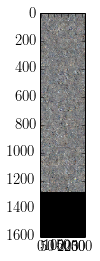

In [8]:
plt.imshow(color_grid_vis(inverse_transform(ejacob.T), (25,5)))

In [ ]:
mjacob.T.shape

In [ ]:
#DEBUGGING
allimgs_2 = np.load('../../dcgan_code/faces/imgs_sampled_2.npy')
allimgs_3 = np.load('../../dcgan_code/faces/imgs_sampled_3.npy')
DIM = (3,64,64)
print allimgs_2.shape,allimgs_3.shape
plt.imshow(color_grid_vis(inverse_transform(allimgs_2),(5,2)))
plt.imshow(color_grid_vis(inverse_transform(allimgs_3),(5,2)))

(3072, 256)


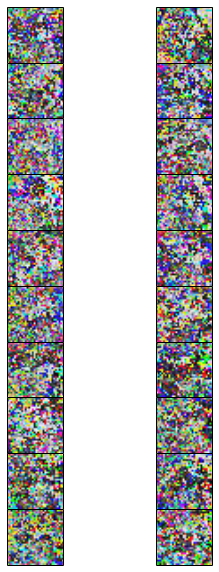

In [10]:
fig,axlist = plt.subplots(10,2,figsize=(8,10))
plt.subplots_adjust(wspace=-0.5, hspace=0)
print ejacob.shape
for ax,img in zip(axlist.ravel(),ejacob.T[:20]):
    ax.imshow(img.reshape(3,32,32).transpose(1,2,0))
    ax.set_xticks([])
    ax.set_yticks([])

In [12]:
pca_e = PCA(n_components=20)
pca_e.fit(ejacob.T)
print pca_e.components_.shape

(20, 3072)


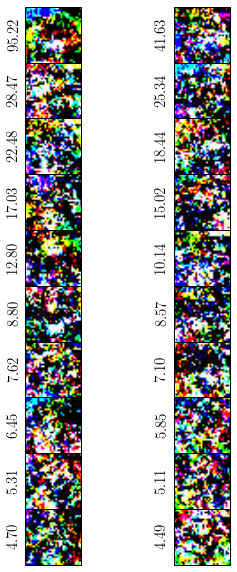

In [14]:
fig,axlist = plt.subplots(10,2,figsize=(8,10))
plt.subplots_adjust(wspace=-0.5, hspace=0)
for ax,img,var in zip(axlist.ravel(),pca_e.components_,pca_e.explained_variance_):
    ax.imshow(img.reshape(3,32,32).transpose(1,2,0))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylabel('%.2f'%var)